# Lead_Scoring_Case_Study

In [446]:
#Importing / Loading the Data
#Data cleaning and preparation : Segmentation
#Preprocessing steps : EDA 
#Data encoding :Converting categorical variables to dummy variables
#Model Evaluation : Test-train split
#Feature scaling
#Model Building using RFE, p-values and VIFs

In [447]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

# Importing / Loading the Data

In [448]:
ldf = pd.read_csv('Leads.csv')
ldf.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [449]:
ldf.shape

(9240, 37)

In [450]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [451]:
ldf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data cleaning and preparation

In [452]:
# a.Drop ID columns - Prospect id
# b.Null Check and Handling : Removing columns with null percent more than 45%
# c.Null Check and Handling : Imputing null values
# d.Duplicate Values : Last Notable Activity and Last Activity 
# e.Outliers : Handling Outliers


In [453]:
#Drop ID columns - Prospect id and 'Lead Number'
ldf.drop(['Prospect ID'],1,inplace=True)
ldf.drop(['Lead Number'],1,inplace=True)

In [454]:
# Null Check and Handling
null_percentage = ldf.isnull().sum()/ldf.shape[0]*100
null_percentage[(null_percentage>40)].count()

5

In [455]:
null_percentage[(null_percentage>40)]

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [456]:
# The details of columns with more than 45% of null values.
# Lead Quality                   51.590909  -- Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
# Asymmetrique Activity Index    45.649351  -- An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Profile Index     45.649351  -- An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Activity Score    45.649351  -- An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Profile Score     45.649351  -- An index and score assigned to each customer based on their activity and their profile

In [457]:
# Removing columns whch column containd more than 45% of Missing Values
delcolms = null_percentage[(null_percentage>40)]
coltodelete = delcolms.keys()
ldf.drop(coltodelete,axis=1,inplace=True)

In [458]:
ldf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [459]:
null_percentage = ldf.isnull().sum()/ldf.shape[0]*100
null_percentage[(null_percentage>0)]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64

In [460]:
# Tags has 36% of null values and as per description it is assigned to customers by company indicating the current status of the lead.

ldf.drop('Tags',1,inplace=True)

In [461]:
# For column 'What matters most to you in choosing a course' has 99% same value this column can be dropped

ldf['What matters most to you in choosing a course'].value_counts('normalize=True')

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [462]:
ldf.drop('What matters most to you in choosing a course',1,inplace=True)

In [463]:
# for column 'What is your current occupation' since most data value is Unemployed,hence replacing NaN with Unemployed

ldf['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [464]:
ldf['What is your current occupation']=ldf['What is your current occupation'].replace(np.nan,'Unemployed')

In [465]:
ldf['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [466]:
# for column 'Last Activity' since most data value is 'Email Opened',hence replacing NaN with 'Email Opened'

ldf['Last Activity']=ldf['Last Activity'].replace(np.nan,'Email Opened')

In [467]:
ldf['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [468]:
# for column 'Lead Source' since most data value is 'Google',hence replacing NaN with 'Google' 

ldf['Lead Source']=ldf['Lead Source'].replace(np.nan,'Google')

In [469]:
ldf['Lead Source']=ldf['Lead Source'].replace('google','Google')

In [470]:
# changing categories which are occured less than 1000
col_dict_ls=dict(ldf['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        ldf['Lead Source']=ldf['Lead Source'].replace(i,'Other')

In [471]:
ldf['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [472]:
# for column 'Country' since city is 'Unknown' for null ,hence replacing NaN with 'Unknown'

ldf['Country']=ldf['Country'].replace(np.nan,'Unknown')

In [473]:
# changing categories which are occured less than 1000
col_dict_ls=dict(ldf['Country'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        ldf['Country']=ldf['Country'].replace(i,'Other')

In [474]:
ldf['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [475]:
# for column 'Specialization' since most data value is 'Finance Management',hence replacing NaN with 'Finance Management' 
ldf = ldf.replace('Select', np.nan)
ldf['Specialization']=ldf['Specialization'].replace(np.nan,'Finance Management')

In [476]:
ldf['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [477]:
# for column 'City' since city is 'Unknown' for null ,hence replacing NaN with 'Unknown' 

ldf['City']=ldf['City'].replace(np.nan,'Unknown')

In [478]:
ldf['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [479]:
# for column 'Lead Profile' since most data value is not known ,hence replacing NaN with Unknown 
ldf['Lead Profile']=ldf['Lead Profile'].replace(np.nan,'Unknown')

In [480]:
ldf['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [481]:
#Since max number of values are Nan , this column can be dropped

ldf.drop('How did you hear about X Education',1,inplace=True)

In [482]:
ldf['I agree to pay the amount through cheque'].value_counts(dropna=False)


No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [483]:
ldf['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [484]:
ldf['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [485]:
ldf['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [486]:
ldf['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [487]:
ldf['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [488]:
ldf['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [489]:
ldf['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [490]:
ldf['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [491]:
ldf['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [492]:
ldf['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [493]:
ldf['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [494]:
#Since all / max values are No , all these column can be dropped
#'I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'
#'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'


ldf.drop('I agree to pay the amount through cheque',1,inplace=True)
ldf.drop('Get updates on DM Content',1,inplace=True)
ldf.drop('Update me on Supply Chain Content',1,inplace=True)
ldf.drop('Receive More Updates About Our Courses',1,inplace=True)
ldf.drop('Search',1,inplace=True)
ldf.drop('Magazine',1,inplace=True)
ldf.drop('Newspaper Article',1,inplace=True)
ldf.drop('X Education Forums',1,inplace=True)
ldf.drop('Newspaper',1,inplace=True)
ldf.drop('Digital Advertisement',1,inplace=True)
ldf.drop('Through Recommendations',1,inplace=True)
ldf.drop('Do Not Call',1,inplace=True)


In [495]:
#Last Notable Activity is same as Last Activity , hence dropping it

ldf.drop('Last Notable Activity',1,inplace=True)

In [496]:
ldf['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [497]:
#Last Notable Activity is same as Last Activity , hence dropping it

#ldf.drop('A free copy of Mastering The Interview',1,inplace=True)

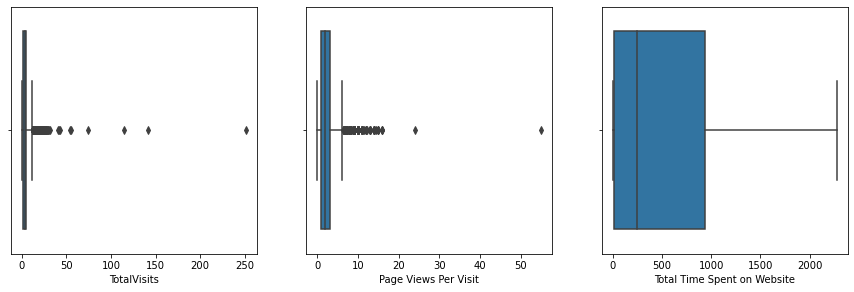

In [498]:
#Outliers : Handling Outliers
# Finding the outliers
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(ldf['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(ldf['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(ldf['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

In [499]:
#Outliers seen in TotalVisits and Page Views Per Visit hence imputing it with median 

ldf['TotalVisits']=ldf['TotalVisits'].fillna(ldf['TotalVisits'].median())
ldf['Page Views Per Visit']=ldf['Page Views Per Visit'].fillna(ldf['Page Views Per Visit'].median())

In [500]:
## No null values present . hence null Handling completed

null_percentage = ldf.isnull().sum()/ldf.shape[0]*100
null_percentage[(null_percentage>0)]

Series([], dtype: float64)

# SEGMENTATION

In [501]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [502]:
targetVar = 'Converted'
ldfnum=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
ldfcat=['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','Specialization','What is your current occupation','Lead Profile','City','A free copy of Mastering The Interview']

# Understanding of Continous Variables

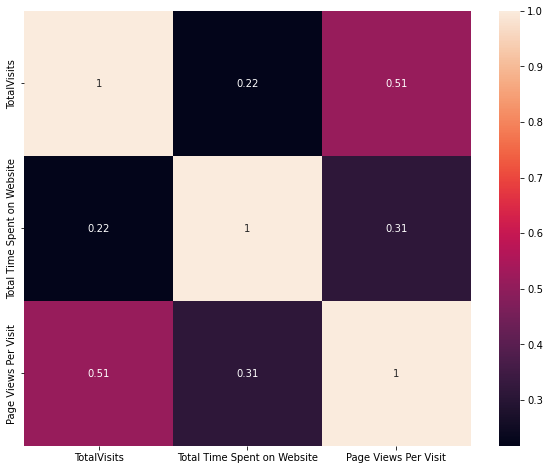

In [503]:
plt.figure(figsize=(10,8))
sns.heatmap(ldf[ldfnum].corr(),annot = True)
plt.show()

# Exploratory Data Analysis 

# Univariate Analysis

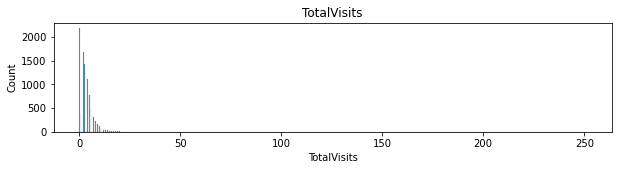

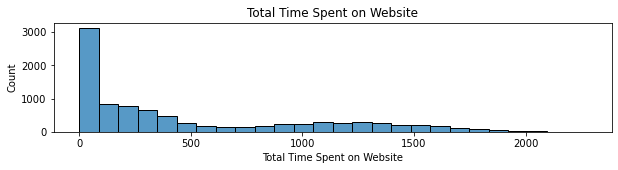

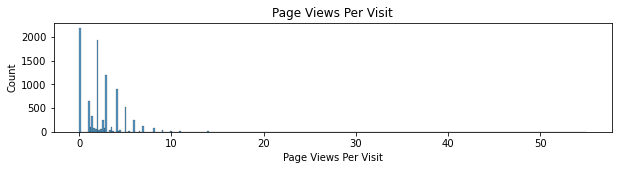

In [504]:
##UNIVARIATE ANALYSIS FOR CONTINOUS/NUMERICAL VARIABLE 

for c in ldfnum :
    plt.figure(figsize=(10,2))
    plt.title(c)
    sns.histplot(ldf[c])
    plt.show()

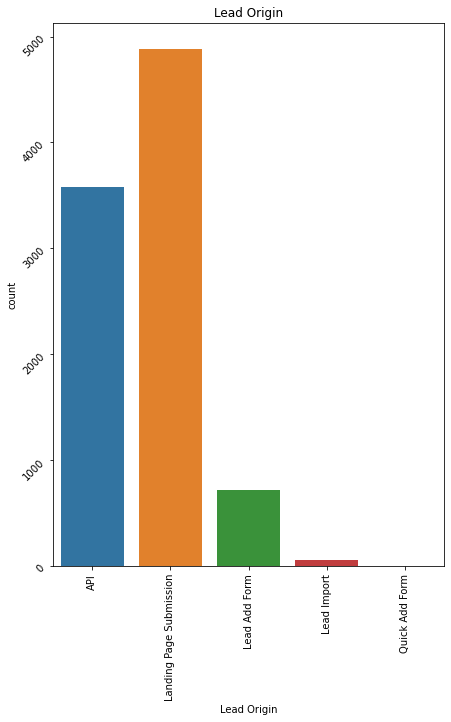

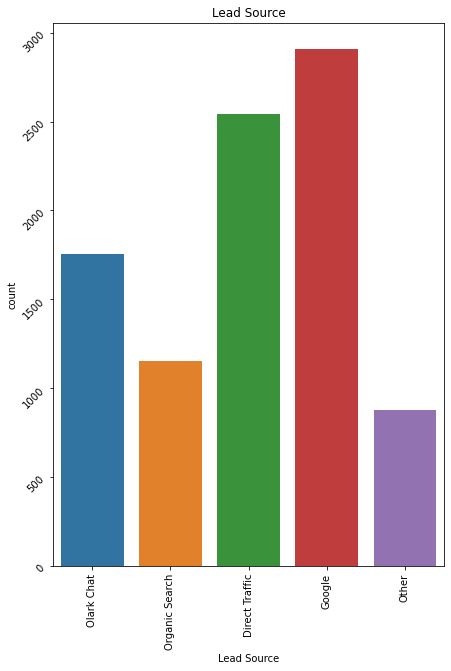

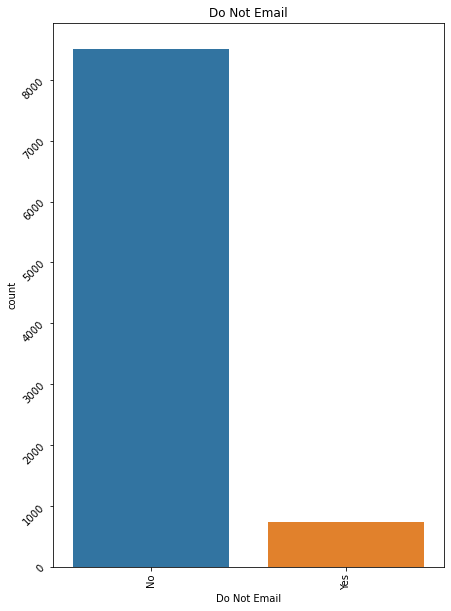

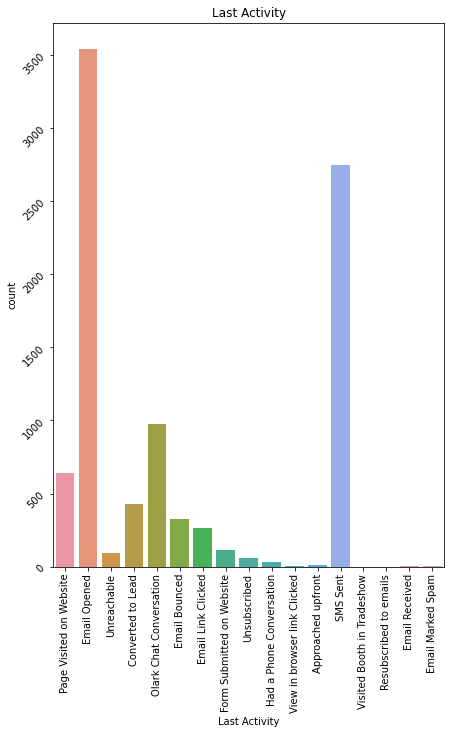

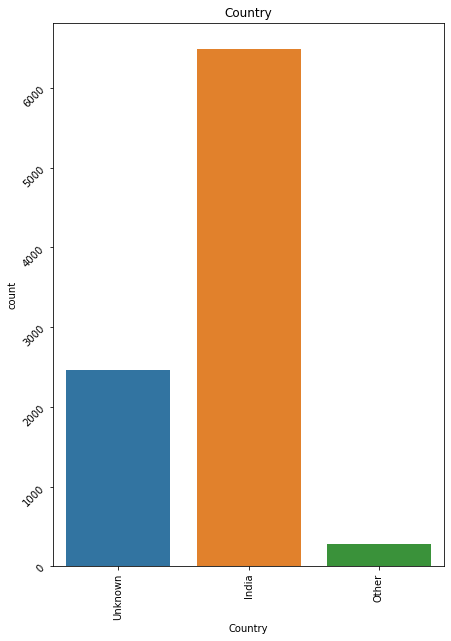

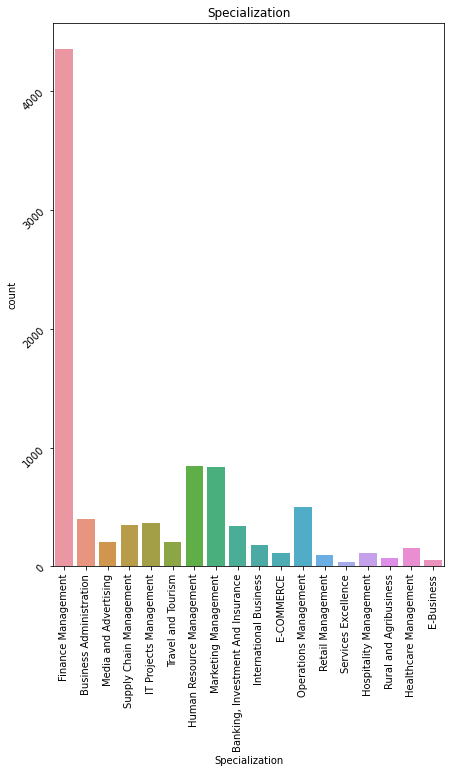

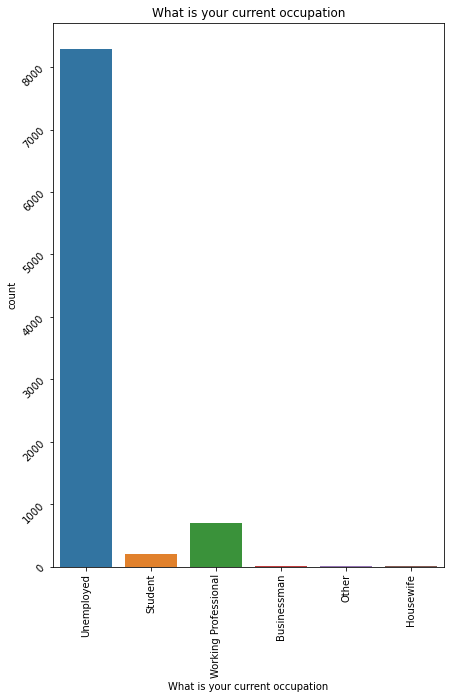

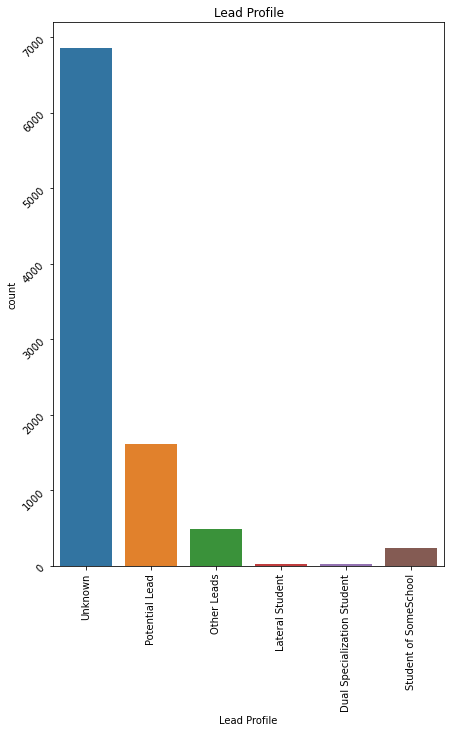

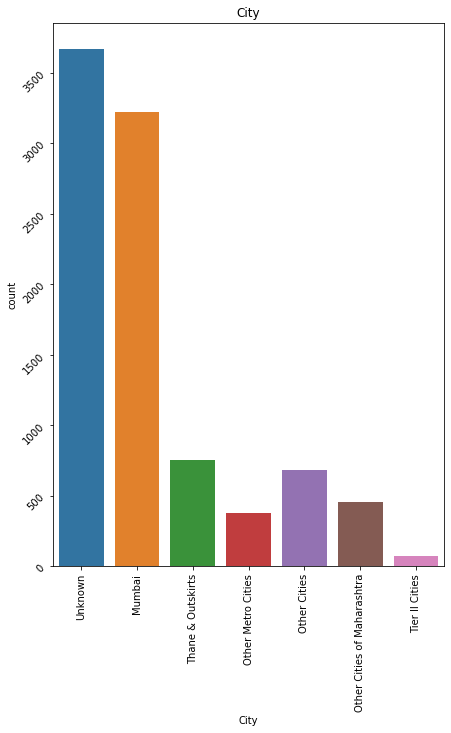

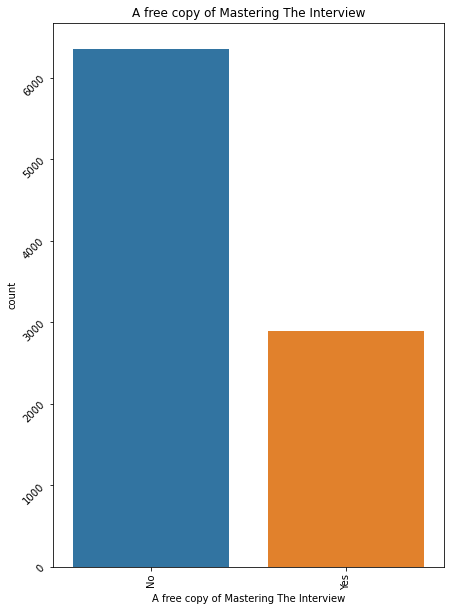

In [505]:
##UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLE 

for c in ldfcat :
    plt.figure(figsize=(7,10))
    plt.title(c)
    sns.countplot(ldf[c])
    plt.yticks(size=10,rotation=45)
    plt.xticks(size=10,rotation=90)
    plt.show()

# Bivariate Analysis

# Target Column : Converted - targetVar

# Categorical vs Categorical Variables

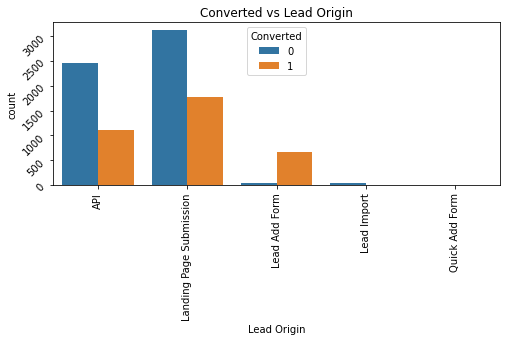

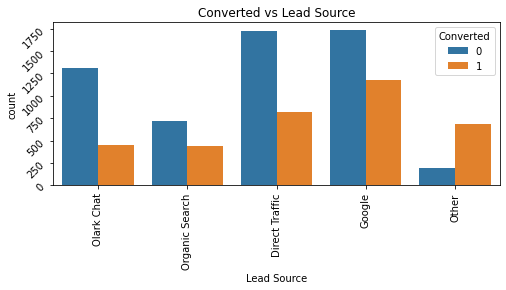

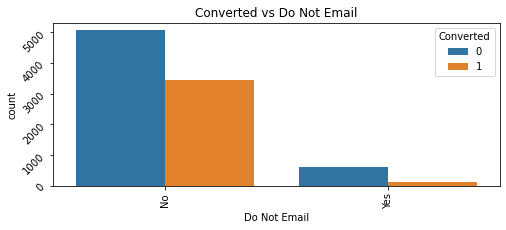

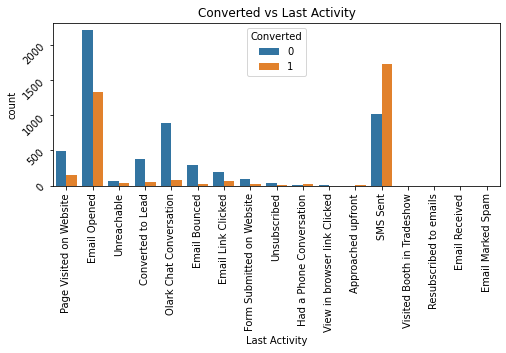

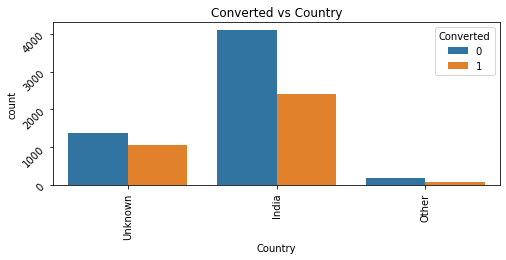

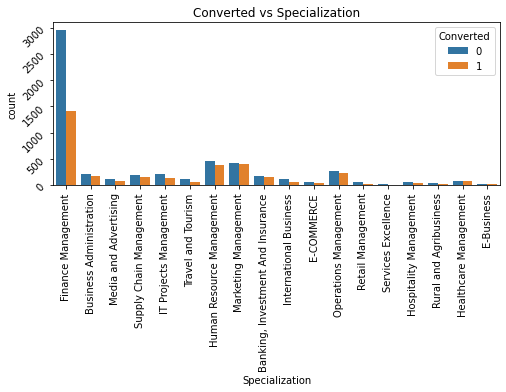

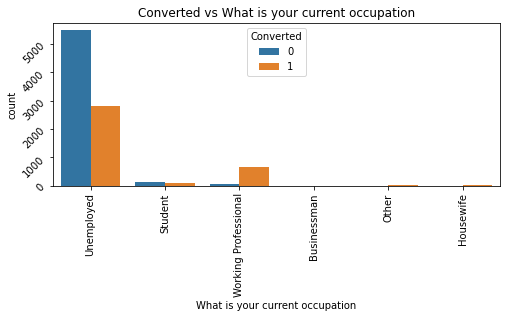

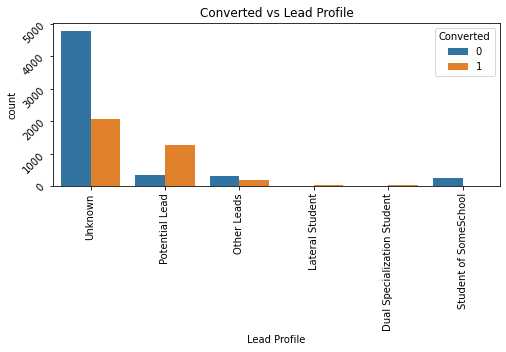

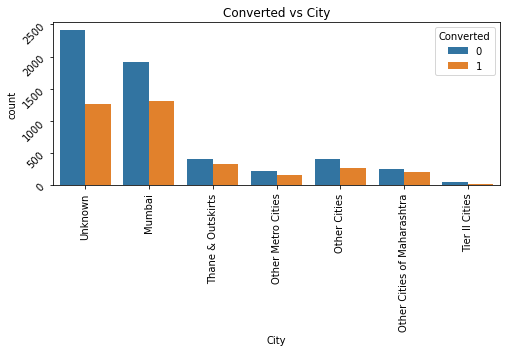

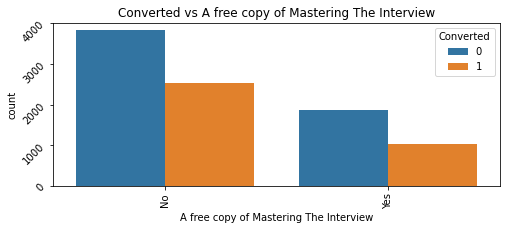

In [506]:
for c2 in ldfcat :
    plt.figure(figsize=(8,3))
    plt.yticks(size=10,rotation=45)
    plt.xticks(size=10,rotation=90)
    plt.title("Converted vs "+c2)
    sns.countplot(data=ldf,x=c2,hue=targetVar)
    plt.show()

In [507]:
#Insights :-
#- Lead Source  : Direct Traffic and Google are the two main source for Converted Leads
#- Last Activity : Email Opened and SMS Sent are the highly Converted Leads
#- Specialization : Leads who choosed Finance Management as Specialization are greater than all others
#- What is your current occupation :  Mostly Unemployed people have high chances of getting Converted 

# Numerical vs Categorical Variables

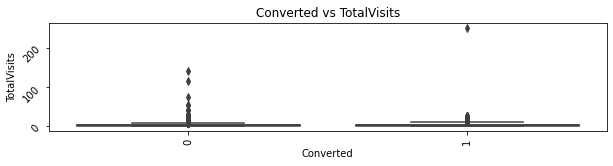

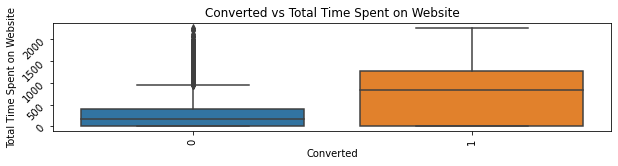

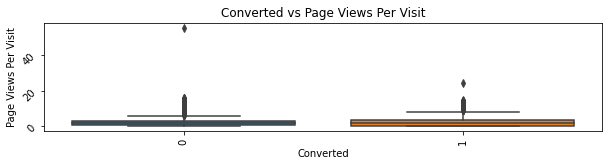

In [508]:
for c2 in ldfnum :
    plt.figure(figsize=(10,2))
    plt.yticks(size=10,rotation=45)
    plt.xticks(size=10,rotation=90)
    plt.title("Converted vs "+c2)
    sns.boxplot(ldf["Converted"],ldf[c2])
    plt.show()

# Data encoding :Converting categorical variables to dummy variables

In [509]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [510]:
ldf.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Finance Management,Unemployed,Unknown,Unknown,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Unknown,Unknown,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Potential Lead,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Unknown,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Unknown,Mumbai,No


In [511]:
ldf['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [512]:
#Creating Dummies
ldf = pd.get_dummies(ldf, drop_first=True)

In [513]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 6   Lead Origin_Lead Import                               9240 non-null   uint8  
 7   Lead Origin_Quick Add Form                            9240 non-null   uint8  
 8   Lead Source_Google                                    9240

In [514]:
# removing unnecessary columns

for c1 in list(ldf):
    if c1 not in ldfnum:
        print(ldf[c1].value_counts())

0    5679
1    3561
Name: Converted, dtype: int64
1    4886
0    4354
Name: Lead Origin_Landing Page Submission, dtype: int64
0    8522
1     718
Name: Lead Origin_Lead Add Form, dtype: int64
0    9185
1      55
Name: Lead Origin_Lead Import, dtype: int64
0    9239
1       1
Name: Lead Origin_Quick Add Form, dtype: int64
0    6331
1    2909
Name: Lead Source_Google, dtype: int64
0    7485
1    1755
Name: Lead Source_Olark Chat, dtype: int64
0    8086
1    1154
Name: Lead Source_Organic Search, dtype: int64
0    8361
1     879
Name: Lead Source_Other, dtype: int64
0    8506
1     734
Name: Do Not Email_Yes, dtype: int64
0    8812
1     428
Name: Last Activity_Converted to Lead, dtype: int64
0    8914
1     326
Name: Last Activity_Email Bounced, dtype: int64
0    8973
1     267
Name: Last Activity_Email Link Clicked, dtype: int64
0    9238
1       2
Name: Last Activity_Email Marked Spam, dtype: int64
0    5700
1    3540
Name: Last Activity_Email Opened, dtype: int64
0    9238
1       2
N

In [515]:
## as per above count of all the below columns are less than 100 hence deleting them


ldf=ldf.drop(['Lead Origin_Quick Add Form','Last Activity_Approached upfront','Last Activity_Email Marked Spam',
              'Last Activity_Email Received','Last Activity_Resubscribed to emails','Last Activity_View in browser link Clicked',
              'Last Activity_Visited Booth in Tradeshow','What is your current occupation_Businessman'],1)



KeyError: "['Last Activity_Approached upfront', 'What is your current occupation_Businessman'] not found in axis"

In [516]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 6   Lead Origin_Lead Import                               9240 non-null   uint8  
 7   Lead Origin_Quick Add Form                            9240 non-null   uint8  
 8   Lead Source_Google                                    9240

# Model Evaluation 

# Splitting into train and test

In [517]:
#Test-train split

df_train, df_test = train_test_split(ldf,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(6468, 65)
(2772, 65)


# Rescaling for variables

In [518]:
scaler = MinMaxScaler()
df_train[ldfnum] = scaler.fit_transform(df_train[ldfnum])
df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
1871,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6795,0,0.015936,0.214349,0.024182,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3516,0,0.019920,0.046655,0.045455,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
8105,0,0.019920,0.541373,0.090909,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3934,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


# Training the model

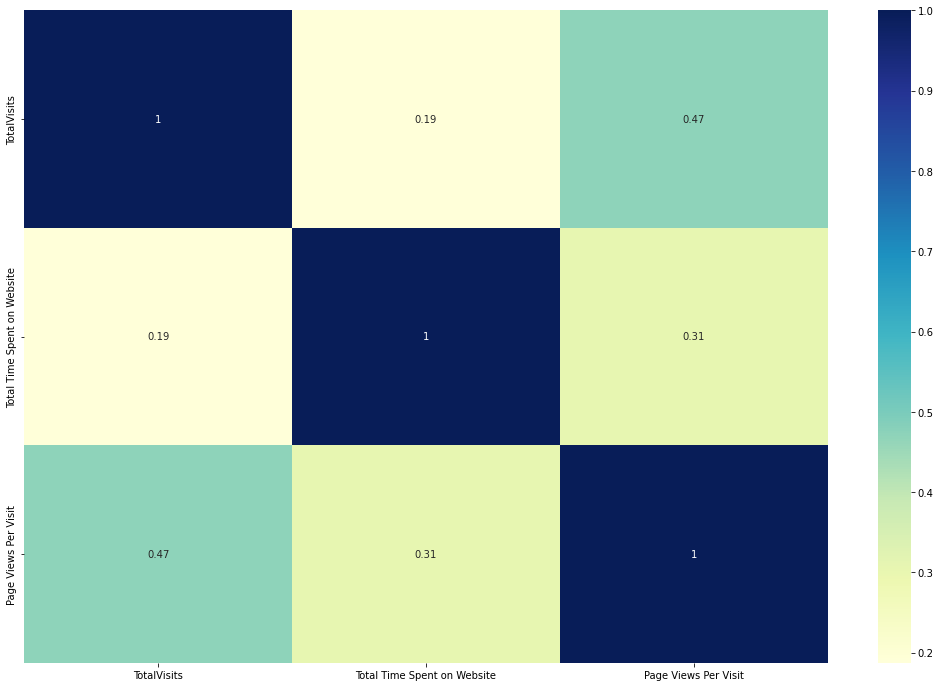

In [519]:
#Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df_train[ldfnum].corr(),annot = True,cmap ="YlGnBu")
plt.show()

In [520]:
y_train = df_train.pop('Converted')

In [521]:
y_test = df_test.pop('Converted')

In [522]:
x_train = df_train

In [523]:
x_test = df_test

In [524]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [525]:
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
1871,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3516,0.019920,0.046655,0.045455,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8105,0.019920,0.541373,0.090909,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [526]:
#Using RFE for selection
lrg=LogisticRegression()


In [527]:
# Running RFE with the output number of the variable equal to 20
rfe=RFE(lrg,n_features_to_select=20)    # running RFE
rfe=rfe.fit(x_train,y_train)


In [528]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False])

In [529]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Other', False, 16),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Marked Spam', False, 25),
 ('Last Activity_Email Opened', False, 38),
 ('Last Activity_Email Received', False, 19),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_Resubscribed to emai

In [530]:
col= x_train.columns[~rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Country_Other',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing M

# Building the Logistic Regression Model

In [531]:
 x_train_rfe = x_train[col]

In [532]:
x_train_sm = sm.add_constant(x_train_rfe)
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3557.8
Date:                Sat, 20 May 2023   Deviance:                       7115.6
Time:                        16:47:01   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2049
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.1635      0.206     -0.795      0.427      -0.566       0.239
Lead Origin_Landing Page Submission           -0.6265      0.125     -5.007      0.000      -0.872      -0.381
Lead Origin_Quick Add Form                    21.3226   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Google                             0.3567      0.095      3.739      0.000       0.170       0.544
Lead Source_Olark Chat                        -0.2897      0.125     -2.320      0.020      -0.534      -0.045
Lead Source_Organic Search                     0.1400      0.105      1.329      0.184      -0.066       0.346
Lead Source_Other                              1.6668      0.145     11.496      0.000       1.383       1.951
Last Activity_Email Link Clicked              -1.0702      0.205     -5.225      0.000      -1.472      -0.669
Last Activity_Email Marked Spam               20.6910   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Email Opened                    -0.4787      0.063     -7.545      0.000      -0.603      -0.354
Last Activity_Email Received                  21.8597   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Activity_Form Submitted on Website       -1.2507      0.290     -4.311      0.000      -1.819      -0.682
Last Activity_Page Visited on Website         -1.0199      0.129     -7.921      0.000      -1.272      -0.768
Last Activity_Unreachable                     -0.7182      0.332     -2.162      0.031      -1.369      -0.067
Last Activity_Unsubscribed                    -1.0966      0.421     -2.605      0.009      -1.922      -0.272
Last Activity_View in browser link Clicked    -0.6734      1.128     -0.597      0.551      -2.885       1.538
Last Activity_Visited Booth in Tradeshow     -20.8694   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Country_Other                                 -0.2950      0.174     -1.693      0.090      -0.637       0.047
Specialization_Business Administration         0.0927      0.191      0.486      0.627      -0.281       0.467
Specialization_E-Business                     -0.2051      0.422     -0.487      0.627      -1.031       0.621
Specialization_E-COMMERCE                     -0.1287      0.291     -0.442      0.658      -0.699       0.442
Specialization_Finance Management             -0.2634      0.151     -1.743      0.081      -0.560       0.033
Specialization_Healthcare Management           0.3907      0.271      1.442      0.149      -0.140       0.922
Specialization_Human Resource Management       0.1495      0.164      0.914      0.361      -0.171       0.470
Specialization_IT Projects Management          0.0927      0.198      0.469      0.639

In [533]:
#VIF
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
    

,Features,VIF
31,Specialization_Supply Chain Management,1.50
23,Specialization_IT Projects Management,1.47
32,Specialization_Travel and Tourism,1.34
26,Specialization_Media and Advertising,1.30
24,Specialization_International Business,1.25
21,Specialization_Healthcare Management,1.21
19,Specialization_E-COMMERCE,1.18
28,Specialization_Retail Management,1.15
29,Specialization_Rural and Agribusiness,1.13
16,Country_Other,1.09


In [534]:

# Function to define model making and testing
def modeltesting(string,x):
    x_train_new=x
    x_train_new = x_train_new.drop([string], axis = 1)
    # now checking the model summary and vif again
    x_train_sm = sm.add_constant(x_train_new)
    #create model
    lr= sm.GLM(y_train,x_train_sm,family = sm.families.Binomial())
    #fit the model
    lr_model= lr.fit()
    # check the params
    print(lr_model.summary())
    vif = pd.DataFrame()
    vif['Features'] = x_train_new.columns
    vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return x_train_new

In [535]:
#Droping variables basis p-value and VIF

#- High p-value and high vif -> drop
#- High p-value and low vif -> remove first
#- Low p-value and high vif -> remove later stage
#- Low p-value and low-vif -> keep

In [536]:
x_train_new = modeltesting('Lead Origin_Quick Add Form',x_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3558.4
Date:                Sat, 20 May 2023   Deviance:                       7116.7
Time:                        16:49:44   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2047
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [537]:
x_train_new = modeltesting('Last Activity_Email Marked Spam',x_train_new) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3558.7
Date:                Sat, 20 May 2023   Deviance:                       7117.4
Time:                        16:51:04   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2046
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [538]:
x_train_new = modeltesting('Last Activity_Email Received',x_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3560.4
Date:                Sat, 20 May 2023   Deviance:                       7120.8
Time:                        16:51:48   Pearson chi2:                 6.50e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2042
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [540]:
x_train_new = modeltesting('Last Activity_Visited Booth in Tradeshow',x_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3560.8
Date:                Sat, 20 May 2023   Deviance:                       7121.6
Time:                        16:54:18   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2041
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [541]:
x_train_new = modeltesting('What is your current occupation_Student',x_train_new) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3560.8
Date:                Sat, 20 May 2023   Deviance:                       7121.6
Time:                        16:55:17   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2041
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [542]:
x_train_new = modeltesting('City_Tier II Cities',x_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3560.8
Date:                Sat, 20 May 2023   Deviance:                       7121.7
Time:                        17:05:12   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2041
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [543]:
x_train_new = modeltesting('Specialization_Retail Management',x_train_new) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3560.9
Date:                Sat, 20 May 2023   Deviance:                       7121.8
Time:                        17:06:23   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2041
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [544]:
x_train_new = modeltesting('Specialization_Services Excellence',x_train_new)  

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3560.9
Date:                Sat, 20 May 2023   Deviance:                       7121.8
Time:                        17:07:22   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2041
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [545]:
x_train_new = modeltesting('Specialization_E-COMMERCE',x_train_new)  

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3560.9
Date:                Sat, 20 May 2023   Deviance:                       7121.9
Time:                        17:08:24   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2041
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [546]:
x_train_new = modeltesting('City_Thane & Outskirts',x_train_new)   

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3561.1
Date:                Sat, 20 May 2023   Deviance:                       7122.1
Time:                        17:09:19   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2041
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [547]:
x_train_new = modeltesting('City_Other Cities of Maharashtra',x_train_new)    

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3561.1
Date:                Sat, 20 May 2023   Deviance:                       7122.3
Time:                        17:10:42   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2040
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [548]:
x_train_new = modeltesting('Specialization_E-Business',x_train_new) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3561.2
Date:                Sat, 20 May 2023   Deviance:                       7122.5
Time:                        17:12:30   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2040
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [549]:
x_train_new = modeltesting('What is your current occupation_Other',x_train_new)  

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3561.4
Date:                Sat, 20 May 2023   Deviance:                       7122.8
Time:                        17:14:10   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2040
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------